In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display

%matplotlib inline

In [2]:
full_df = pd.read_hdf('race1.hd5')

In [3]:
def make_boat_tacks(df, boat_name):
    df2 = df[boat_name].copy()

    df2['CWD'] = df2['CourseWindDirection']

    df2['WC_DIFF'] = (df2['CWD'] - df2['COG']) #Wind Course difference
    #create a series named WC_DIFF180 that is the elementwise modulo 180 of WC_DIFF
    df2['WC_DIFF180'] = df2['WC_DIFF'] % 180
    df2['WC_DIFF360'] = df2['WC_DIFF'] % 360
    df2['GYB_DIFF'] = df2['WC_DIFF'] - 180
    df2['GYB_DIFF360'] = df2['GYB_DIFF'] % 360

    # every timestamp where WC_DIFF180 is less than 1
    tacks = df2[df2['WC_DIFF360'] <1].index.values
    gybes = df2[df2['GYB_DIFF360'] <1].index.values
    return df2, tacks, gybes
    

<function __main__.update_plot>

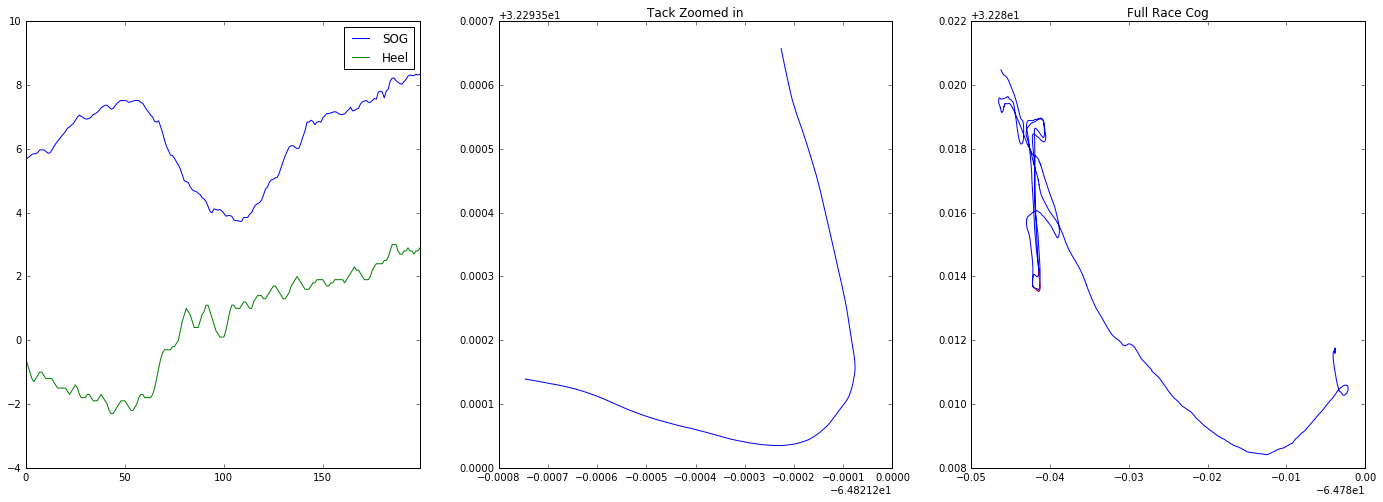

In [4]:
#df2, tacks, gybes = make_boat_tacks(full_df, 'USA')
def update_plot(tack_num, boat_name):
    df2, tacks, gybes = make_boat_tacks(full_df, boat_name)
    tstamp = tacks[tack_num]
    t_idx = df2.index.get_loc(tstamp)
    window_width = 100
    start, end = t_idx - window_width, t_idx + window_width
    start = np.max(start,0)
    df3 = df2.ix[start:end]
    idx_range = np.arange(window_width*2)
    df3.index = idx_range
    #fig = plt.figure(figsize=(8,5))
    #ax = fig.add_axes([0,0,1,1], polar=True)
    #COG_h, = ax.plot(df3.COG * (np.pi/180), idx_range, label='Boat Heading')
    #cwd_h, = ax.plot(df3.CWD * (np.pi/180), idx_range, color='green', label='CourseWindDirection')
    #cwd_180_h, = ax.plot((df3.CWD - 180) * (np.pi/180), idx_range, color='red', label='CourseWindDirection - 180')
    fig, ax = plt.subplots(ncols=3, figsize=(24,8))
    ax1, ax2, ax3 = ax
    
    #df3.CB_CWD.plot(title="%d" % tstamp, ax=ax1)
    #df3.CW_COG.plot(color='green', ax=ax1)
    #df3.WC_DIFF.plot(color='red', ax=ax1)

    df3.SOG.plot(legend="SOG", ax=ax1)
    df3.Heel.plot(legend="Heel", ax=ax1)
    
    ax2.plot(df3.Lon, df3.Lat )
    ax2.set_title("Tack Zoomed in")
    
    ax3.plot(df2.Lon, df2.Lat, color='blue')# legend="Full Course", title="Full Race COG")
    ax3.plot(df3.Lon, df3.Lat, color='red') # legend="Tack Course", linewidth=3.0)

    ax3.set_title( "Full Race Cog")
    
    plt.figure()
#interact(update_plot, boat_name=['FRA', 'USA', 'JPN', 'SWE', 'GBR', 'NZL'], tack_num=(0, len(tacks) -1, 1))
interact(update_plot, boat_name=['FRA', 'USA', 'JPN', 'SWE', 'GBR', 'NZL'], tack_num=(0, 10, 1))